In [19]:
!pip install matplotlib
!pip install seaborn
!pip install spicy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 341.0 kB/s eta 0:01:59
    --------------------------------------- 0.8/41.0 MB 486.2 kB/s eta 0:01:23
    --------------------------------------- 0.8/41.0 MB 486.2 kB/s eta 0:01:23
    --------------------------------------- 0.8/41.0 MB 486.2 kB/s eta 0:01:23
   - -------------------------------------- 1.0/41.0 MB 458.6 kB/s eta 0:01:28
   - -------------------------------------- 1

In [2]:
#configurar estilo de visualizaciones 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [4]:
df = pd.read_csv('data\clean_anime.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Fernando\AppData\Local\Temp\ipykernel_11356\3378339980.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('data\clean_anime.csv')


,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,themes,synopsis,...,source,duration,rating,rank,popularity,favorites,scored_by,members,premiered_season,premiered_year
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.31,"Adventure, Drama, Fantasy",NaN,During their decade-long quest to defeat the D...,...,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63387,605478,1038347,fall,2023
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",Military,After a horrific alchemy experiment goes wrong...,...,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,232007,2196965,3484360,spring,2009
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Eccentric scientist Rintarou Okabe has a never...,...,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194580,1450481,2669303,spring,2011
3,60022,https://myanimelist.net/anime/60022/One_Piece_...,https://cdn.myanimelist.net/images/anime/1455/...,One Piece Fan Letter,One Piece Fan Letter,ONE PIECE FAN LETTER,9.06,"Action, Adventure, Fantasy",NaN,Although the golden age of piracy is about to ...,...,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2334,1976,69555,92128,unknown,unknown
4,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Seeking to restore humanity's diminishing hope...,...,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60535,1671960,2409440,spring,2019


## Hypothesis: Number of anime consumers is higher for anime released after 2000 than for anime released before or in 2000.
Null Hypothesis (H₀): The average number of members for anime released before or in 2000 is the same as or greater than the average number of members for anime released after 2000. (μ₁ ≥ μ₂)
Alternative Hypothesis (H₁): The average number of members for anime released after 2000 is greater than the average number of members for anime released before or in 2000. (μ₁ < μ₂)
Where:
Alternative Hypothesis (H2): The average number of members for anime released before 2000 is greater than the average number of members for anime released after 2000. (μ₁ > μ₂)
Where:
μ₁ = Population mean of "Number of Members" for anime released before or in 2000.
μ₂ = Population mean of "Number of Members" for anime released after 2000.

In [38]:
df['premiered_year'] = pd.to_numeric(df['premiered_year'], errors='coerce')  # Convierte y pone NaN en errores
df = df.dropna(subset=['premiered_year'])  # Elimina filas con NaN en el año
df['premiered_year'] = df['premiered_year'].astype(int)  # Ahora convierte a entero
df = df[df['premiered_year'] > 1900]  # Discard year 1900 and before
df = df[df['premiered_year'] != 2025]  # Discard year 2025, since it's got only 3 months of data
My1 = df[df['premiered_year'].astype(int) <= 2000].groupby('premiered_year')['members'].mean().dropna()
My2 = df[df['premiered_year'].astype(int) > 2000].groupby('premiered_year')['members'].mean().dropna()
print(f"Number of otakus before/in 2000: {My1.mean()}")
print(f"Number of otakus after 2000: {My2.mean()}")
if My1.mean() == My2.mean():
    print("Null Hypothesis (H₀) scenario. Mean of the members is the same")
elif My1.mean() > My2.mean():
    print("Alternative Hypothesis (H₁) scenario. Mean of the members is greater before 2000")
elif My1.mean() < My2.mean():
    print("Alternative Hypothesis (H2) scenario. Mean of the members is greater after 2000")


Number of otakus before/in 2000: 20561.761478337387
Number of otakus after 2000: 204684.37590202372
Alternative Hypothesis (H2) scenario. Mean of the members is greater after 2000


In [40]:
from scipy.stats import spearmanr
import pandas as pd

# Convertir 'premiered_year' a numérico y eliminar valores no numéricos
df['premiered_year'] = pd.to_numeric(df['premiered_year'], errors='coerce')
df = df.dropna(subset=['premiered_year'])
df['premiered_year'] = df['premiered_year'].astype(int)

# Filtrar datos desde el 2000 en adelante
df_after_2000 = df[df['premiered_year'] > 2000]

# Agrupar por año y calcular la media de miembros
yearly_members = df.groupby('premiered_year')['members'].mean()


# Aplicar la prueba de correlación de Spearman para analizar la tendencia
correlation, p_value = spearmanr(yearly_members.index, yearly_members.values)


# Resultados
print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀): Existe una tendencia creciente en el número de miembros por año.")
else:
    print("No hay suficiente evidencia para rechazar H₀: No se puede concluir que el número de miembros ha aumentado cada año.")


Spearman Correlation: 0.9301075268817205
P-value: 3.1860814976942015e-28
Rechazamos la hipótesis nula (H₀): Existe una tendencia creciente en el número de miembros por año.


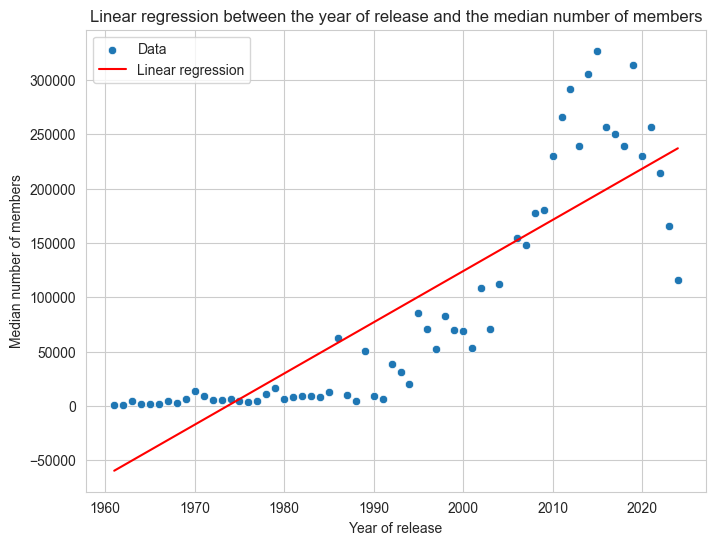

In [41]:
from scipy.stats import linregress

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(yearly_members.index, yearly_members.values)

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar los datos originales (aquí, los índices son los años y los valores son las medias de miembros)
sns.scatterplot(x=yearly_members.index, y=yearly_members.values, label='Data')

# Graficar la línea de regresión
plt.plot(yearly_members.index, slope * yearly_members.index + intercept, color='red', label='Linear regression')

# # Mostrar los puntos con sus valores
# for i in range(len(yearly_members)):
#     plt.text(yearly_members.index[i], yearly_members.values[i], f"({yearly_members.index[i]}, {yearly_members.values[i]})", 
#              horizontalalignment='left', size='small', color='black')

# Etiquetas y título
plt.title('Linear regression between the year of release and the median number of members')
plt.xlabel('Year of release')
plt.ylabel('Median number of members')
plt.legend()

# Mostrar el gráfico
plt.show()


Choose a Statistical Test:

Since you are comparing the means of two independent groups, an independent samples t-test (or Welch's t-test if the variances are unequal) is appropriate.

Check for Normality: Before applying the t-test, it's good practice to check if your data is approximately normally distributed. You can use a visual method (histogram, Q-Q plot) or a statistical test (Shapiro-Wilk test). If the data deviates significantly from normality, you might consider non-parametric tests like the Mann-Whitney U test.

Check for Equal Variances: The standard independent samples t-test assumes equal variances between the two groups. You can use Levene's test or Bartlett's test to check for this. If the variances are significantly different, you should use Welch's t-test, which does not assume equal variances.

In [ ]:
from scipy import stats

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(df_before_2000, df_after_2000)
print(f"Levene's test p-value: {levene_p}")

alpha = 0.05  # Significance level

if levene_p > alpha:
    # Variances are likely equal, use standard independent samples t-test
    t_stat, p_value = stats.ttest_ind(df_before_2000, df_after_2000, equal_var=True, alternative='less')
    print("Using standard independent samples t-test")
else:
    # Variances are likely unequal, use Welch's t-test
    t_stat, p_value = stats.ttest_ind(df_before_2000, df_after_2000, equal_var=False, alternative='less')
    print("Using Welch's t-test")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Interpret the Results:

Compare the p-value from the t-test to your chosen significance level (alpha, typically 0.05).

If p-value ≤ alpha: Reject the null hypothesis (H₀). There is statistically significant evidence to suggest that the average number of members for anime released after 2000 is greater than for those released before or in 2000.
If p-value > alpha: Fail to reject the null hypothesis (H₀). There is not enough statistically significant evidence to suggest that the average number of members for anime released after 2000 is greater than for those released before or in 2000.

8. Consider Non-Parametric Test (if needed):

If your data significantly violates the normality assumption, you can use the Mann-Whitney U test (also known as the Wilcoxon rank-sum test) as a non-parametric alternative.

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test (for one-sided test, adjust accordingly)
u_stat, p_value_mannwhitney = mannwhitneyu(df_before_2000, df_after_2000, alternative='less')

print(f"Mann-Whitney U statistic: {u_stat}")
print(f"Mann-Whitney U p-value: {p_value_mannwhitney}")

# Interpret the p-value similarly to the t-test

mportant Considerations:

Data Quality: Ensure your "Number of Members" data is accurate and that you have a reliable way to determine the release year of each anime. Handle missing values appropriately.
Causation vs. Correlation: Even if you find a statistically significant difference, remember that correlation does not imply causation. There could be other factors influencing the number of members over time (e.g., increased internet access, growth of anime popularity).
Sample Representativeness: Consider if your dataset is a representative sample of all anime released on MyAnimeList.
Effect Size: While statistical significance tells you if the difference is likely not due to random chance, it doesn't tell you the magnitude of the effect. You might want to calculate effect sizes (e.g., Cohen's d) to understand the practical significance of any observed differences.
Potential Confounding Factors: Are there other factors that might be different between the pre-2000 and post-2000 anime groups that could influence the number of members (e.g., genre popularity shifts, changes in MyAnimeList's user base over time)?
By following these steps and adapting the code to your specific dataset, you can perform a statistical hypothesis test to investigate the potential increase in the number of members for anime on MyAnimeList since the year 2000. Remember to carefully interpret the results in the context of your data and research question.

In [ ]:
!pip install spicy
from scipy import stats

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(df_before_2000, df_after_2000)
print(f"Levene's test p-value: {levene_p}")

alpha = 0.05  # Significance level

if levene_p > alpha:
    # Variances are likely equal, use standard independent samples t-test
    t_stat, p_value = stats.ttest_ind(df_before_2000, df_after_2000, equal_var=True, alternative='less')
    print("Using standard independent samples t-test")
else:
    # Variances are likely unequal, use Welch's t-test
    t_stat, p_value = stats.ttest_ind(df_before_2000, df_after_2000, equal_var=False, alternative='less')
    print("Using Welch's t-test")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")